In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### 1. Read the column description and ensure you understand each attribute well

In [2]:
bank=pd.read_csv("Bank_Personal_Loan.csv")
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### 2. Study the data distribution in each attribute, share your findings

In [93]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# Convert all non-numeric values to number
cat=['CCAvg']
for var in cat:
    le = preprocessing.LabelEncoder()
    bank[var]=le.fit_transform(bank[var].astype('str'))
bank.dtypes


ID                    int64
Age                   int64
Experience            int64
Income                int64
ZIP Code              int64
Family                int64
CCAvg                 int32
Education             int64
Mortgage              int64
Personal Loan         int64
Securities Account    int64
CD Account            int64
Online                int64
CreditCard            int64
dtype: object

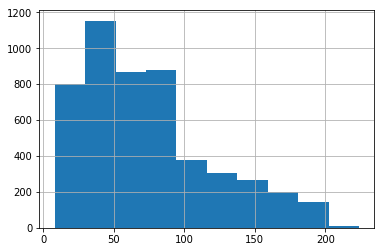

In [94]:
# Histogram of variable ApplicantIncome

bank['Income'].hist()

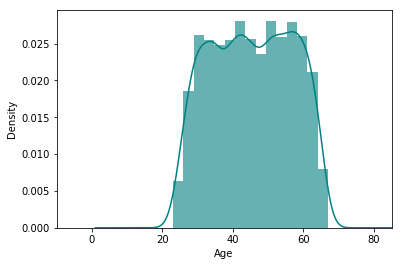

In [96]:
# To check how the 'Age' variable looks like in general.
ax = bank["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
bank["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

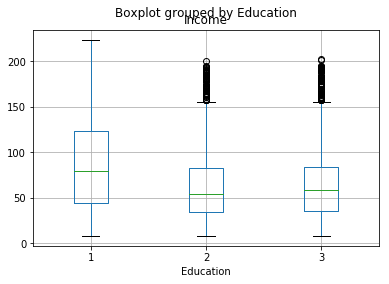

In [97]:
# Box Plot for variable ApplicantIncome by variable Education of  data set

bank.boxplot(column="Income", by = "Education")

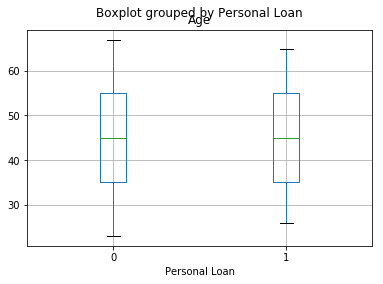

In [98]:
# Box Plot for variable LoanAmount by variable Gender of training data set

bank.boxplot(column='Age', by = 'Personal Loan')

In [99]:
# Credit History and Loan Status
pd.crosstab(bank ['CreditCard'], bank ['Personal Loan'], margins=True)

Personal Loan,0,1,All
CreditCard,,,
0,3193,337,3530
1,1327,143,1470
All,4520,480,5000


In [101]:
# Loan approval rates in absolute numbers
loan_approval = bank['Personal Loan'].value_counts()[1]
print('Number of People with Loan Approved:',loan_approval)

Number of People with Loan Approved: 480


### 3. Get the target column distribution. Your comments

In [102]:
# Target Variable Frequency Distribution

freq = bank['Personal Loan'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
freq

,Personal Loan,count,prop
0,0,4520,0.904
1,1,480,0.096


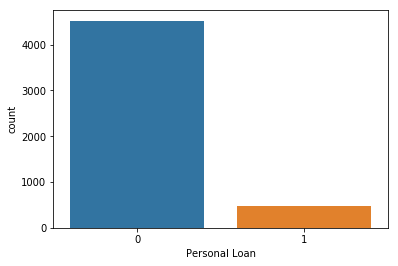

In [103]:
import seaborn as sns
sns.countplot(bank['Personal Loan'])

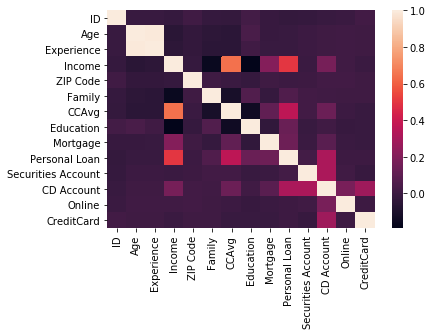

In [105]:
sns.heatmap(bank.corr())
plt.show()

### 4. Split the data into training and test set in the ratio of 70:30 respectively

In [29]:
features = ["Age","Income"]
X = bank[features]
y = bank["Personal Loan"]

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
print("Data in Training:",X_train.shape)
print("Data in Test:",X_test.shape)

Data in Training: (3500, 2)
Data in Test: (1500, 2)


### 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans 

## Logistic Regression Model

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Predicting the Test Results

In [17]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Making Confusion Matrx

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
cm

array([[1327,   45],
       [  76,   52]], dtype=int64)

Visiualizing the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


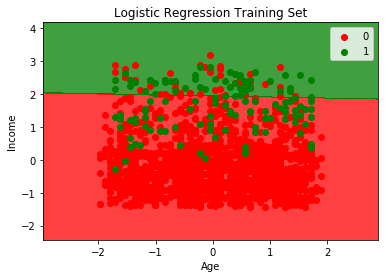

In [24]:
from matplotlib.colors import ListedColormap
# Visualizing the Training Set

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test

#X1, X2, X3 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=0.01), np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=0.01), np.arange(start = X_set[:,2].min()-1, stop = X_set[:,2].max()+1, step=0.01))
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=0.01), np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=0.01))


plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label=j)


plt.title ('Logistic Regression Training Set')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


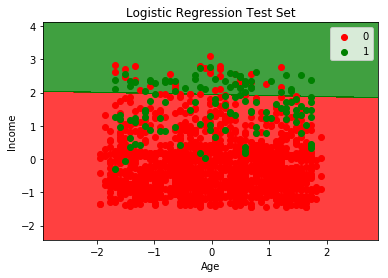

In [107]:
# Visualizing the Test Set

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

#X1, X2, X3 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=0.01), np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=0.01), np.arange(start = X_set[:,2].min()-1, stop = X_set[:,2].max()+1, step=0.01))
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=0.01), np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=0.01))


plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label=j)


plt.title ('Logistic Regression Test Set')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

### K-NN Model

In [65]:
features = ["Age","Income"]
X = bank[features]
y = bank["Personal Loan"]

#Spliting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

print("Data in Training:",X_train.shape)
print("Data in Test:",X_test.shape)

Data in Training: (3500, 2)
Data in Test: (1500, 2)


In [66]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#print(X_train)
print('---------------')
#print(y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


---------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [67]:
# Fitting KNN Classifier to Training set
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=5, p=2, metric = 'minkowski')
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [69]:
# Predicting the test set results

y_pred = KNN_model.predict(X_test)
print(y_pred)

# Confusion Matrix for  KNN

from sklearn.metrics import confusion_matrix
cmKNN = confusion_matrix(y_test, y_pred)
print(cmKNN)


[0 0 0 ... 0 0 0]
[[1300   56]
 [  94   50]]


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1356
           1       0.47      0.35      0.40       144

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.70      0.65      0.67      1500
weighted avg       0.89      0.90      0.89      1500



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


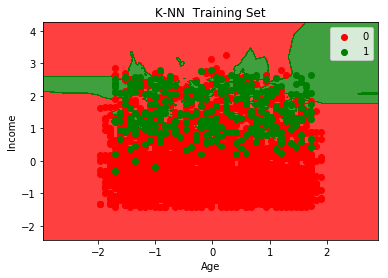

In [71]:
# Visualizing the Training Set

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

#X1, X2, X3 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=0.01), np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=0.01), np.arange(start = X_set[:,2].min()-1, stop = X_set[:,2].max()+1, step=0.01))
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=0.01), np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=0.01))


plt.contourf(X1, X2, KNN_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label=j)


plt.title ('K-NN  Training Set')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


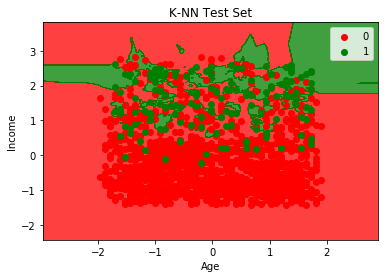

In [72]:
# Visualizing the Test Set

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

#X1, X2, X3 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=0.01), np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=0.01), np.arange(start = X_set[:,2].min()-1, stop = X_set[:,2].max()+1, step=0.01))
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=0.01), np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=0.01))


plt.contourf(X1, X2, KNN_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label=j)


plt.title ('K-NN Test Set')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

### Naïve Bayes

In [74]:
features = ["Age","Income"]
X2 = bank[features]
y2 = bank["Personal Loan"]

#Spliting the dataset into training and test set
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.3)

print("Data in Training:",X2_train.shape)
print("Data in Test:",X2_test.shape)

 # Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_NB = StandardScaler()
X2_train = sc_NB.fit_transform(X2_train)
X2_test = sc_NB.transform(X2_test)
#print(X_train)
print('---------------')
#print(y_train)

#Train and Fit NaiveBayes Model
from sklearn.naive_bayes import GaussianNB
classifierNB = GaussianNB()
classifierNB.fit(X2_train, y2_train)

# Predicting the data
y2_pred = classifierNB.predict(X2_test)
y2_pred

from sklearn.metrics import  classification_report
print('classification_report:', classification_report(y2_test, y2_pred))



Data in Training: (3500, 2)
Data in Test: (1500, 2)
---------------
classification_report:               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1354
           1       0.45      0.45      0.45       146

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.69      0.69      0.69      1500
weighted avg       0.89      0.89      0.89      1500



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


In [76]:
features = ["Age","Income"]
X = bank[features]
y = bank["Personal Loan"]

#Spliting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

print("Data in Training:",X_train.shape)
print("Data in Test:",X_test.shape)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
scN = StandardScaler()
X_train = scN.fit_transform(X_train)
X_test = scN.transform(X_test)
#print(X_train)
print('---------------')
#print(y_train)

Data in Training: (3500, 2)
Data in Test: (1500, 2)
---------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


In [79]:
# Fitting Classifier to Training set
from sklearn.naive_bayes import GaussianNB
classifierNBT = GaussianNB()
classifierNBT.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [109]:
# Predicting the test set results

y_predNB = classifierNBT.predict(X_test)
print(y_predNB)



[0 0 0 ... 0 0 0]


In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predNB))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1372
           1       0.48      0.51      0.49       128

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.72      0.73      0.72      1500
weighted avg       0.91      0.91      0.91      1500



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


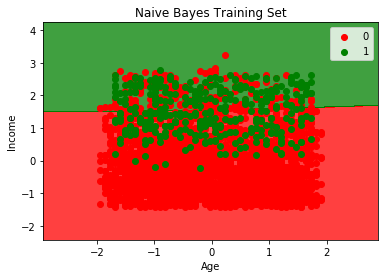

In [82]:
# Visualizing the Training Set

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

#X1, X2, X3 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=0.01), np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=0.01), np.arange(start = X_set[:,2].min()-1, stop = X_set[:,2].max()+1, step=0.01))
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=0.01), np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=0.01))


plt.contourf(X1, X2, classifierNB.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label=j)


plt.title ('Naive Bayes Training Set')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


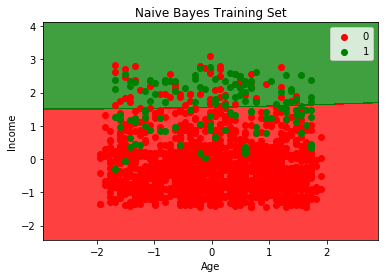

In [83]:
# Visualizing the Test Set

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

#X1, X2, X3 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=0.01), np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=0.01), np.arange(start = X_set[:,2].min()-1, stop = X_set[:,2].max()+1, step=0.01))
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=0.01), np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=0.01))


plt.contourf(X1, X2, classifierNB.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label=j)


plt.title ('Naive Bayes Training Set')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

### 6. Print the confusion matrix for all the above models 

In [87]:
# Confusion Matrix for Logistic Regression
from sklearn.metrics import confusion_matrix
cmL = confusion_matrix(y_test, y_predNB)
print( cmL)

# print("The correct Predictions is 1269 + 6 = 1275")
# print("The In - correct Predictions is 143 + 82 = 225")


# Accuracy 

from sklearn.metrics import accuracy_score
# score1 = LogisticRegression.score(X_test, y_test)
# print(score1)
print(accuracy_score(y_test, y_predNB))

[[1302   70]
 [  63   65]]
0.9113333333333333


In [108]:
# Confusion Matrix for  KNN

from sklearn.metrics import confusion_matrix
cmNB = confusion_matrix(y_test, y_predNB)
print(cmNB)

[[1302   70]
 [  63   65]]


In [88]:
# Confusion Matrix for  Naive Bayes

from sklearn.metrics import confusion_matrix
cmG = confusion_matrix(y_test, y_predN)
print(cmG)

print(accuracy_score(y_test, y_predN))

[[1302   70]
 [  63   65]]
0.9113333333333333


### 7. Give your reasoning on which is the best model in this case and why it performs better? 

In [ ]:
Naive Bayes assumes that the features are conditionally independent. Real data sets are never perfectly independent but they can be close. 
In short Naive Bayes has a higher bias but lower variance compared to logistic regression and K-NN. 
If the data set follows the bias then Naive Bayes will be a better classifier.